In [1]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [2]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [3]:
# 대륙간 국가 개수 , 대륙간 국가 몇개 있는지 출력하시오.
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [4]:
df[df['continent'] == 'AF'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF


In [5]:
# AF 대륙에 속하는 국가의 맥주소비량을 출력하시오.
df[df['continent'] == 'AF']['beer_servings'].head()

2      25
4     217
18     34
22    173
26     25
Name: beer_servings, dtype: int64

In [6]:
# 대륙간 맥주 소비량 출력하시오.
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [7]:
# 대륙별 평균 wine_serving 출력하시오.
df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [8]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [9]:
# 상관관계 함수
df[['beer_servings','wine_servings']].corr(method='pearson')

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [10]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [11]:
# 4개 모두 다 상관관계 행렬구현
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [12]:
df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index

Index(['EU', 'AF', 'SA', 'AS', 'OC'], dtype='object', name='continent')

<BarContainer object of 5 artists>

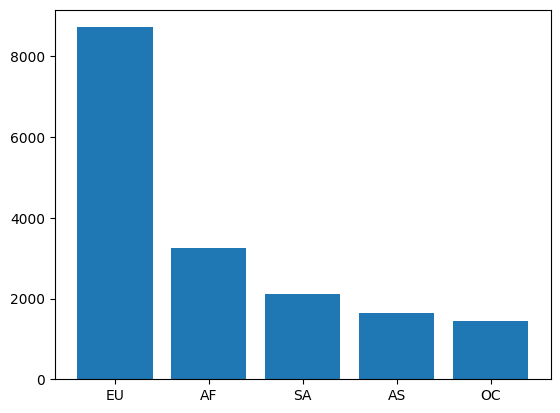

In [18]:
# 대륙별 맥주소비량,와인소비량 평균,최소,최대,합계
# apply(): 함수호출, agg():그룹함수 사용
df.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])

# 맥주소비량이 가장 높은 대륙은 어떻게 되는지 출력하시오.
x = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
y = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values
x
y
# 막대그래프 대륙별 맥주소비량 그래프로 구현하시오.
import matplotlib.pyplot as plt
# x = [1,2,3]
# y = [2,4,8]
# plt.plot(x,y)
plt.bar(x,y)


In [14]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [15]:
# AF,EU 맥주 소비량 출력하시오.
# 차이를 출력하시오.
beer_af = df[df['continent']=='AF']['beer_servings'].sum()
beer_eu = df[df['continent']=='EU']['beer_servings'].sum()
beer_eu - beer_af

5462

In [16]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [19]:
# 컬럼의 모든 술의 총량을 출력하시오.
# total_servings
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']

<BarContainer object of 20 artists>

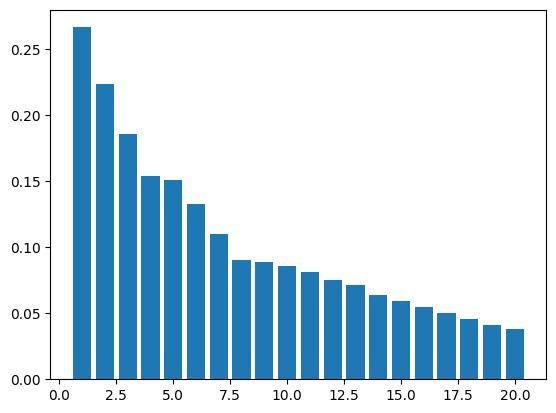

In [33]:
# 술소비량 대비 알콜 비율이 어느정도 량이 되는지 출력하시오.
# 'alcohol_rate 컬럼을 추가해서 정렬하시오.
# 국가 alcohol_rate 비율을 가지고 역순정렬로 20개까지 출력하시오.
df['alcohol_rate'] = df['total_litres_of_pure_alcohol']/df['total_servings']
df.sort_values('alcohol_rate',ascending=False).head(20)[['country','alcohol_rate']]

# 막대그래프로 출력하시오.
df_country = df.sort_values('alcohol_rate',ascending=False).head(20)['country']
df_alcohol_rate = df.sort_values('alcohol_rate',ascending=False).head(20)['alcohol_rate']
import matplotlib.pyplot as plt

df_country = [i+1 for i in range(len(df_country)) ]
# print(i_list)
# x = [1,2,3]
# y = [2,4,8]
# plt.plot(x,y)
plt.bar(df_country,df_alcohol_rate)
